# Exploratory data analysis (EDA)

Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import datetime as dt
from prophet import Prophet
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
from scipy.stats import f_oneway


In [2]:
bh = pd.read_csv(r"C:\Users\HWLEE\Desktop\study\Project data\shopping\shopping_behavior_updated.csv")
bh


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
print(bh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Check any null values in the table

In [4]:
bh.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Correlation between columns

In [5]:
bhn = pd.get_dummies(bh, columns=['Gender','Promo Code Used','Subscription Status'], drop_first=False)

bh_n = bhn.select_dtypes(include=[float, int, bool]) 
bh_n

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Promo Code Used_No,Promo Code Used_Yes,Subscription Status_No,Subscription Status_Yes
0,1,55,53,3.1,14,False,True,False,True,False,True
1,2,19,64,3.1,2,False,True,False,True,False,True
2,3,50,73,3.1,23,False,True,False,True,False,True
3,4,21,90,3.5,49,False,True,False,True,False,True
4,5,45,49,2.7,31,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,True,False,True,False,True,False
3896,3897,52,49,4.5,41,True,False,True,False,True,False
3897,3898,46,33,2.9,24,True,False,True,False,True,False
3898,3899,44,77,3.8,24,True,False,True,False,True,False


In [6]:
bh_a = bh_n.select_dtypes(include=[float, int, bool]) 


In [7]:
bh_a

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Promo Code Used_No,Promo Code Used_Yes,Subscription Status_No,Subscription Status_Yes
0,1,55,53,3.1,14,False,True,False,True,False,True
1,2,19,64,3.1,2,False,True,False,True,False,True
2,3,50,73,3.1,23,False,True,False,True,False,True
3,4,21,90,3.5,49,False,True,False,True,False,True
4,5,45,49,2.7,31,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,True,False,True,False,True,False
3896,3897,52,49,4.5,41,True,False,True,False,True,False
3897,3898,46,33,2.9,24,True,False,True,False,True,False
3898,3899,44,77,3.8,24,True,False,True,False,True,False


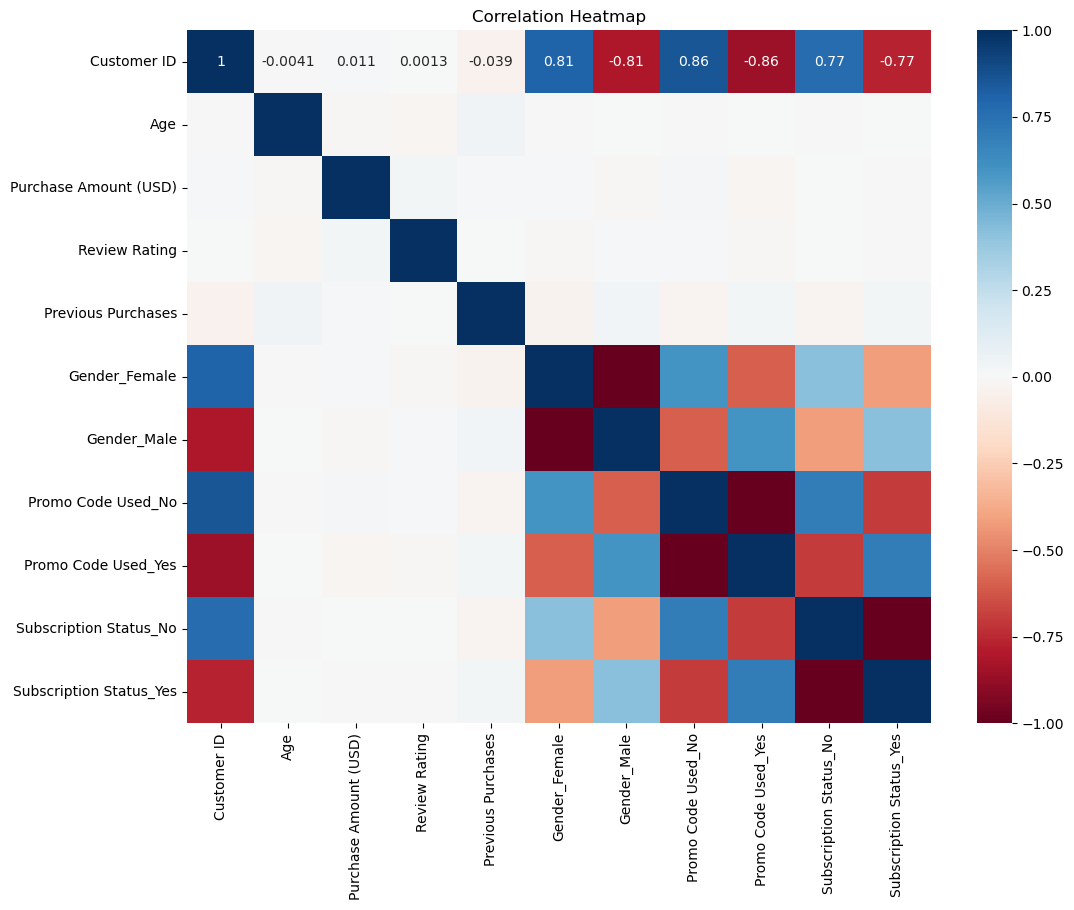

In [8]:
plt.figure(figsize=(12, 9))
sns.heatmap(bh_a.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.yticks(rotation=0)
plt.show()

Seems like Subscription and Promocode is related to Male

Updating outlier

In [9]:
Q1 = bh['Purchase Amount (USD)'].quantile(0.25)
Q3 = bh['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bh= bh[(bh['Purchase Amount (USD)'] >= lower_bound) & (bh['Purchase Amount (USD)'] <= upper_bound)]

In [10]:
bh.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Distribution Visualization

C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

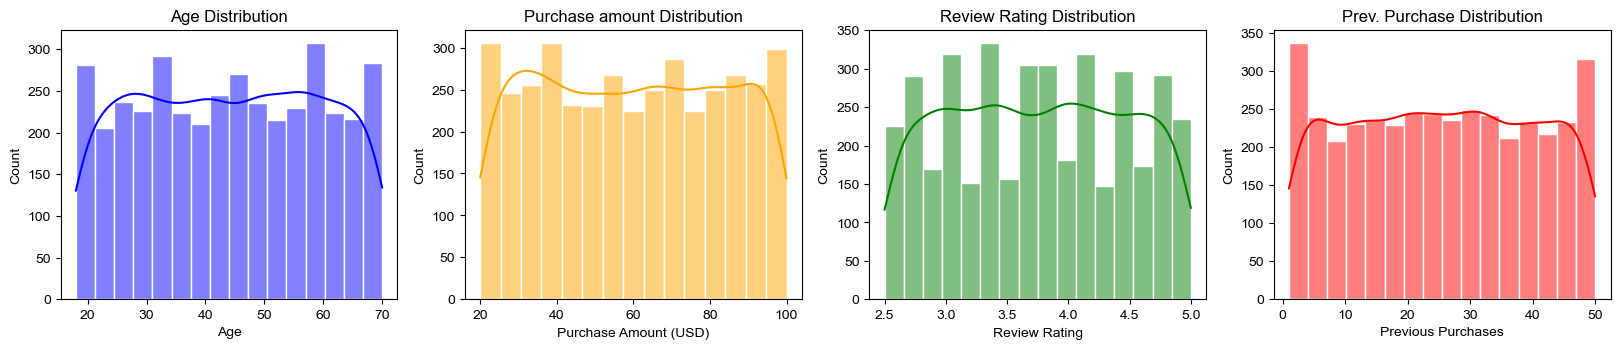

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(20,3.5))
sns.set(style='darkgrid')

sns.histplot(data=bh_a, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=bh_a, x='Purchase Amount (USD)', kde=True, color='orange', ax=axs[1])
sns.histplot(data=bh_a, x='Review Rating', kde=True, color='green', ax=axs[2])
sns.histplot(data=bh_a, x='Previous Purchases', kde=True, color='red', ax=axs[3])


axs[0].set_title('Age Distribution')
axs[1].set_title('Purchase amount Distribution')
axs[2].set_title('Review Rating Distribution')
axs[3].set_title('Prev. Purchase Distribution')


plt.show()

Create groups based on ages and gender

In [17]:
age_bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']
bh['Age Group'] = pd.cut(bh['Age'], bins=age_bins, labels=age_labels, right=False)

bh['Target Group'] = bh['Age Group'].astype(str) + " " + bh['Gender']

Analyze Average Purchase amount, Purchase frequency, and category preferences

In [18]:
target_groups = {
    group: data for group, data in bh.groupby('Target Group')
}

analysis_results = []

for group, data in target_groups.items():
    # average purchase amount
    avg_purchase_amount = data['Purchase Amount (USD)'].mean()
    
    # freq. purchases
    purchase_frequency = data['Previous Purchases'].mean() 
    
    # category preference
    if 'Category' in data.columns:  
        preferred_category = data['Category'].mode()[0] if not data['Category'].empty else 'N/A'
    else:
        preferred_category = 'N/A'
    
    # save the result
    analysis_results.append({
        'Target Group': group,
        'Average Purchase Amount (USD)': avg_purchase_amount,
        'Purchase Frequency': purchase_frequency,
        'Preferred Category': preferred_category
    })


analysis_df = pd.DataFrame(analysis_results).sort_values(
    by='Average Purchase Amount (USD)', ascending=False
)

# Result
print(analysis_df)

    Target Group  Average Purchase Amount (USD)  Purchase Frequency  \
2   21-30 Female                      61.982456           25.469298   
10    60+ Female                      61.398374           24.800813   
0   11-20 Female                      61.042553           22.276596   
9     51-60 Male                      60.402647           26.621928   
1     11-20 Male                      60.300971           23.174757   
5     31-40 Male                      60.295918           25.202041   
8   51-60 Female                      60.177686           25.305785   
4   31-40 Female                      59.811966           24.196581   
3     21-30 Male                      59.386000           24.882000   
7     41-50 Male                      58.807377           25.569672   
11      60+ Male                      58.653137           26.636531   
6   41-50 Female                      57.876494           23.725100   

   Preferred Category  
2            Clothing  
10           Clothing  
0   

Visualization

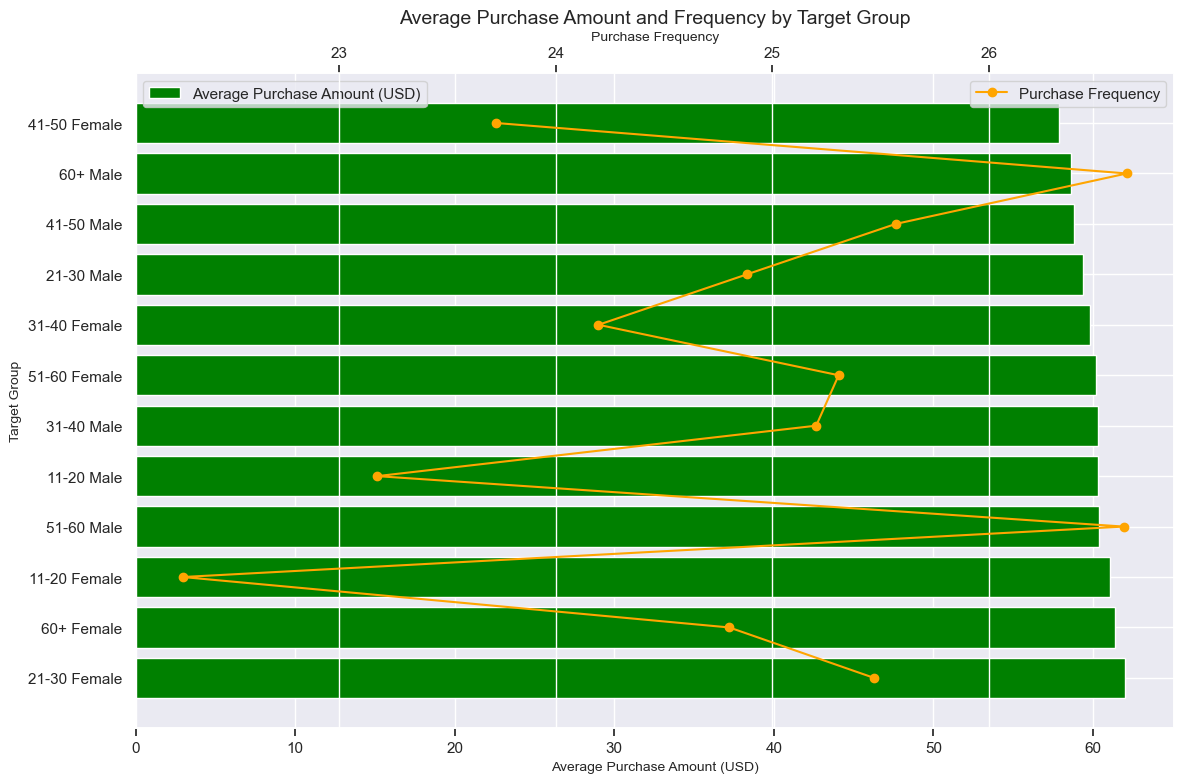

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Average purchase amount
ax1.barh(
    analysis_df['Target Group'],
    analysis_df['Average Purchase Amount (USD)'],
    color='green',
    label='Average Purchase Amount (USD)'
)
ax1.set_xlabel('Average Purchase Amount (USD)', fontsize=10)
ax1.set_ylabel('Target Group', fontsize=10)

# purchase frequency
ax2 = ax1.twiny()
ax2.plot(
    analysis_df['Purchase Frequency'],
    analysis_df['Target Group'],
    color='orange',
    marker='o',
    label='Purchase Frequency'
)
ax2.set_xlabel('Purchase Frequency', fontsize=10)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Average Purchase Amount and Frequency by Target Group', fontsize=14)
plt.tight_layout()
plt.show()


preferred categories

In [20]:
print("\nPreferred Categories by Target Group:")
for _, row in analysis_df.iterrows():
    print(f"{row['Target Group']}: {row['Preferred Category']}")


Preferred Categories by Target Group:
21-30 Female: Clothing
60+ Female: Clothing
11-20 Female: Accessories
51-60 Male: Clothing
11-20 Male: Clothing
31-40 Male: Clothing
51-60 Female: Clothing
31-40 Female: Clothing
21-30 Male: Clothing
41-50 Male: Clothing
60+ Male: Clothing
41-50 Female: Clothing


### Conclusion

21-30 Female: High purchase amount and frequency. Focus on loyalty programs and fashion-centric campaigns.\
60+ Female: High purchase amount, average frequency. Emphasize quality and use discount coupons to boost purchases.\
11-20 Female: High purchase amount, low frequency. Promote accessories with social media campaigns and discounts.\
51-60 Male: High purchase amount and frequency. Highlight premium clothing and offer membership discounts.\
11-20 Male: High purchase amount, average frequency. Focus on trendy streetwear and events with coupons.\
31-40 Male: High purchase amount, average frequency. Promote practical clothing and family discounts.\
51-60 Female: High purchase amount, average frequency. Market premium products and consider subscription services.\
31-40 Female: High purchase amount, average frequency. Highlight affordable fashion and family-oriented promotions.\
21-30 Male: High purchase amount and frequency. Offer personalized clothing recommendations and promotions.\
41-50 Male: High purchase amount and frequency. Focus on affordable, practical clothing with regular discounts.\
60+ Male: High purchase amount and frequency. Market premium, durable clothing and provide loyalty benefits.\
41-50 Female: High purchase amount, average frequency. Emphasize value-for-money clothing with targeted events.